#머신러닝 입문

### linear regression

#### 기존의 프로그래밍 방식

In [2]:
def celsius_to_fahereheit(x):
    return x * 1.8 + 32

In [5]:
celsius_value = int(input('섭씨온도: '))
print(f'화씨온도: {celsius_to_fahereheit(celsius_value)}')

섭씨온도: 33
화씨온도: 91.4


#### 머신러닝 방식

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 0 ~ 99까지 섭씨 온도와 화씨 온도 데이터 생성
data_C = np.array(range(0, 100))
data_F = celsius_to_fahereheit(data_C)
print(data_C)
print(data_F)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 32.   33.8  35.6  37.4  39.2  41.   42.8  44.6  46.4  48.2  50.   51.8
  53.6  55.4  57.2  59.   60.8  62.6  64.4  66.2  68.   69.8  71.6  73.4
  75.2  77.   78.8  80.6  82.4  84.2  86.   87.8  89.6  91.4  93.2  95.
  96.8  98.6 100.4 102.2 104.  105.8 107.6 109.4 111.2 113.  114.8 116.6
 118.4 120.2 122.  123.8 125.6 127.4 129.2 131.  132.8 134.6 136.4 138.2
 140.  141.8 143.6 145.4 147.2 149.  150.8 152.6 154.4 156.2 158.  159.8
 161.6 163.4 165.2 167.  168.8 170.6 172.4 174.2 176.  177.8 179.6 181.4
 183.2 185.  186.8 188.6 190.4 192.2 194.  195.8 197.6 199.4 201.2 203.
 204.8 206.6 208.4 210.2]


In [11]:
# 단일 뉴런 모델 생성
model = Sequential()
model.add(InputLayer(input_shape=(1,)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
# 입출력 값 크기 스케일링
scaled_data_C = data_C / 100
scaled_data_F = data_F / 100
print(scaled_data_C)
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76 

In [13]:
# 학습 전 예측 결과
model.predict([0.01])

array([[0.01308864]], dtype=float32)

In [18]:
# 학습 전 모델
model.save('before_learning.h5')

In [15]:
fit_hist = model.fit(scaled_data_C, scaled_data_F, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 1s 3ms/step - loss: 0.3316
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3183
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3093
Epoch 4/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.3014
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2944
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2875
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2807
Epoch 8/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2743
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2679
Epoch 10/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2620
Epoch 11/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2557
Epoch 12/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2502
Epoch 13/1000
4/4 [==============================

In [16]:
# 학습 후 예측 결과
print(model.predict([0.01]))

[[0.33824292]]


In [20]:
# 학습 후 모델 저장
model.save('after_learning.h5')

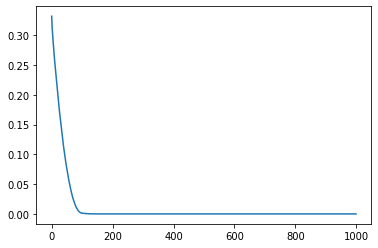

In [21]:
# 학습 횟수에 따른 loss 변화
plt.plot(fit_hist.history['loss'])
plt.show()

#### 잡음이 있는 실제 데이터

In [22]:
noise = np.array(np.random.normal(0, 0.05, 100)) # 평균이 0이고 편차가 0.05인 잡음 100개
print(noise)

[ 0.04464868 -0.03699111  0.08062898 -0.02641982  0.0752388   0.01375706
  0.06155401 -0.03193937 -0.0102634   0.00228695 -0.02224398  0.06602359
  0.05062526 -0.01508492 -0.01628566 -0.10720057 -0.01357338 -0.02272553
 -0.08839165  0.01290374  0.08380405 -0.00338247  0.04141163 -0.10850446
  0.08253293 -0.05384309  0.03135473 -0.08532838 -0.02718632 -0.00948518
  0.00584719 -0.07521892  0.0213518   0.01509984  0.01297397  0.03561003
 -0.08378797  0.01460072  0.0676335   0.01747784 -0.01884661  0.14463039
  0.00268162 -0.01511081 -0.08555227  0.01085965  0.0076859   0.0457792
  0.10125927  0.11178713 -0.02399328  0.03424493 -0.05529108  0.08070301
 -0.0151191   0.0688143  -0.00317056  0.01768073 -0.01279011 -0.02343986
 -0.04094519  0.03798921  0.02904034  0.15258498 -0.10924775  0.02481347
 -0.08345263 -0.02719919  0.01738106  0.03104791  0.10190871  0.02418873
 -0.07605432 -0.07374881 -0.03983177 -0.05043896 -0.15577819  0.06087374
 -0.07305366 -0.01194764  0.09762465  0.00228017  0.

In [24]:
# F에 잡음 추가(100 * 100)
noised_scaled_data_F = np.array([])
for data in scaled_data_F:
    noised_scaled_data_F = np.append(
        noised_scaled_data_F,
        np.random.normal(0, 0.05, 100) + data,
        )
print(noised_scaled_data_F)
print(len(noised_scaled_data_F))

[0.36399686 0.4177353  0.34346445 ... 2.0183072  2.107955   2.25165692]
10000


In [27]:
# C 데이터의 수를 F의 수에 맞춤(100*100)
noised_scaled_data_C = []
for data in range(0, 100):
    for i in range(0, 100):
        noised_scaled_data_C.append(data)
noised_scaled_data_C = np.array(noised_scaled_data_C)
noised_scaled_data_C = noised_scaled_data_C / 100
print(noised_scaled_data_C)
print(len(noised_scaled_data_C))

[0.   0.   0.   ... 0.99 0.99 0.99]
10000


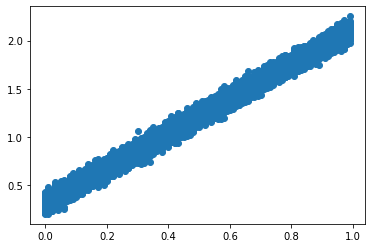

In [29]:
plt.scatter(
    x=noised_scaled_data_C,
    y=noised_scaled_data_F,
    )
plt.show()

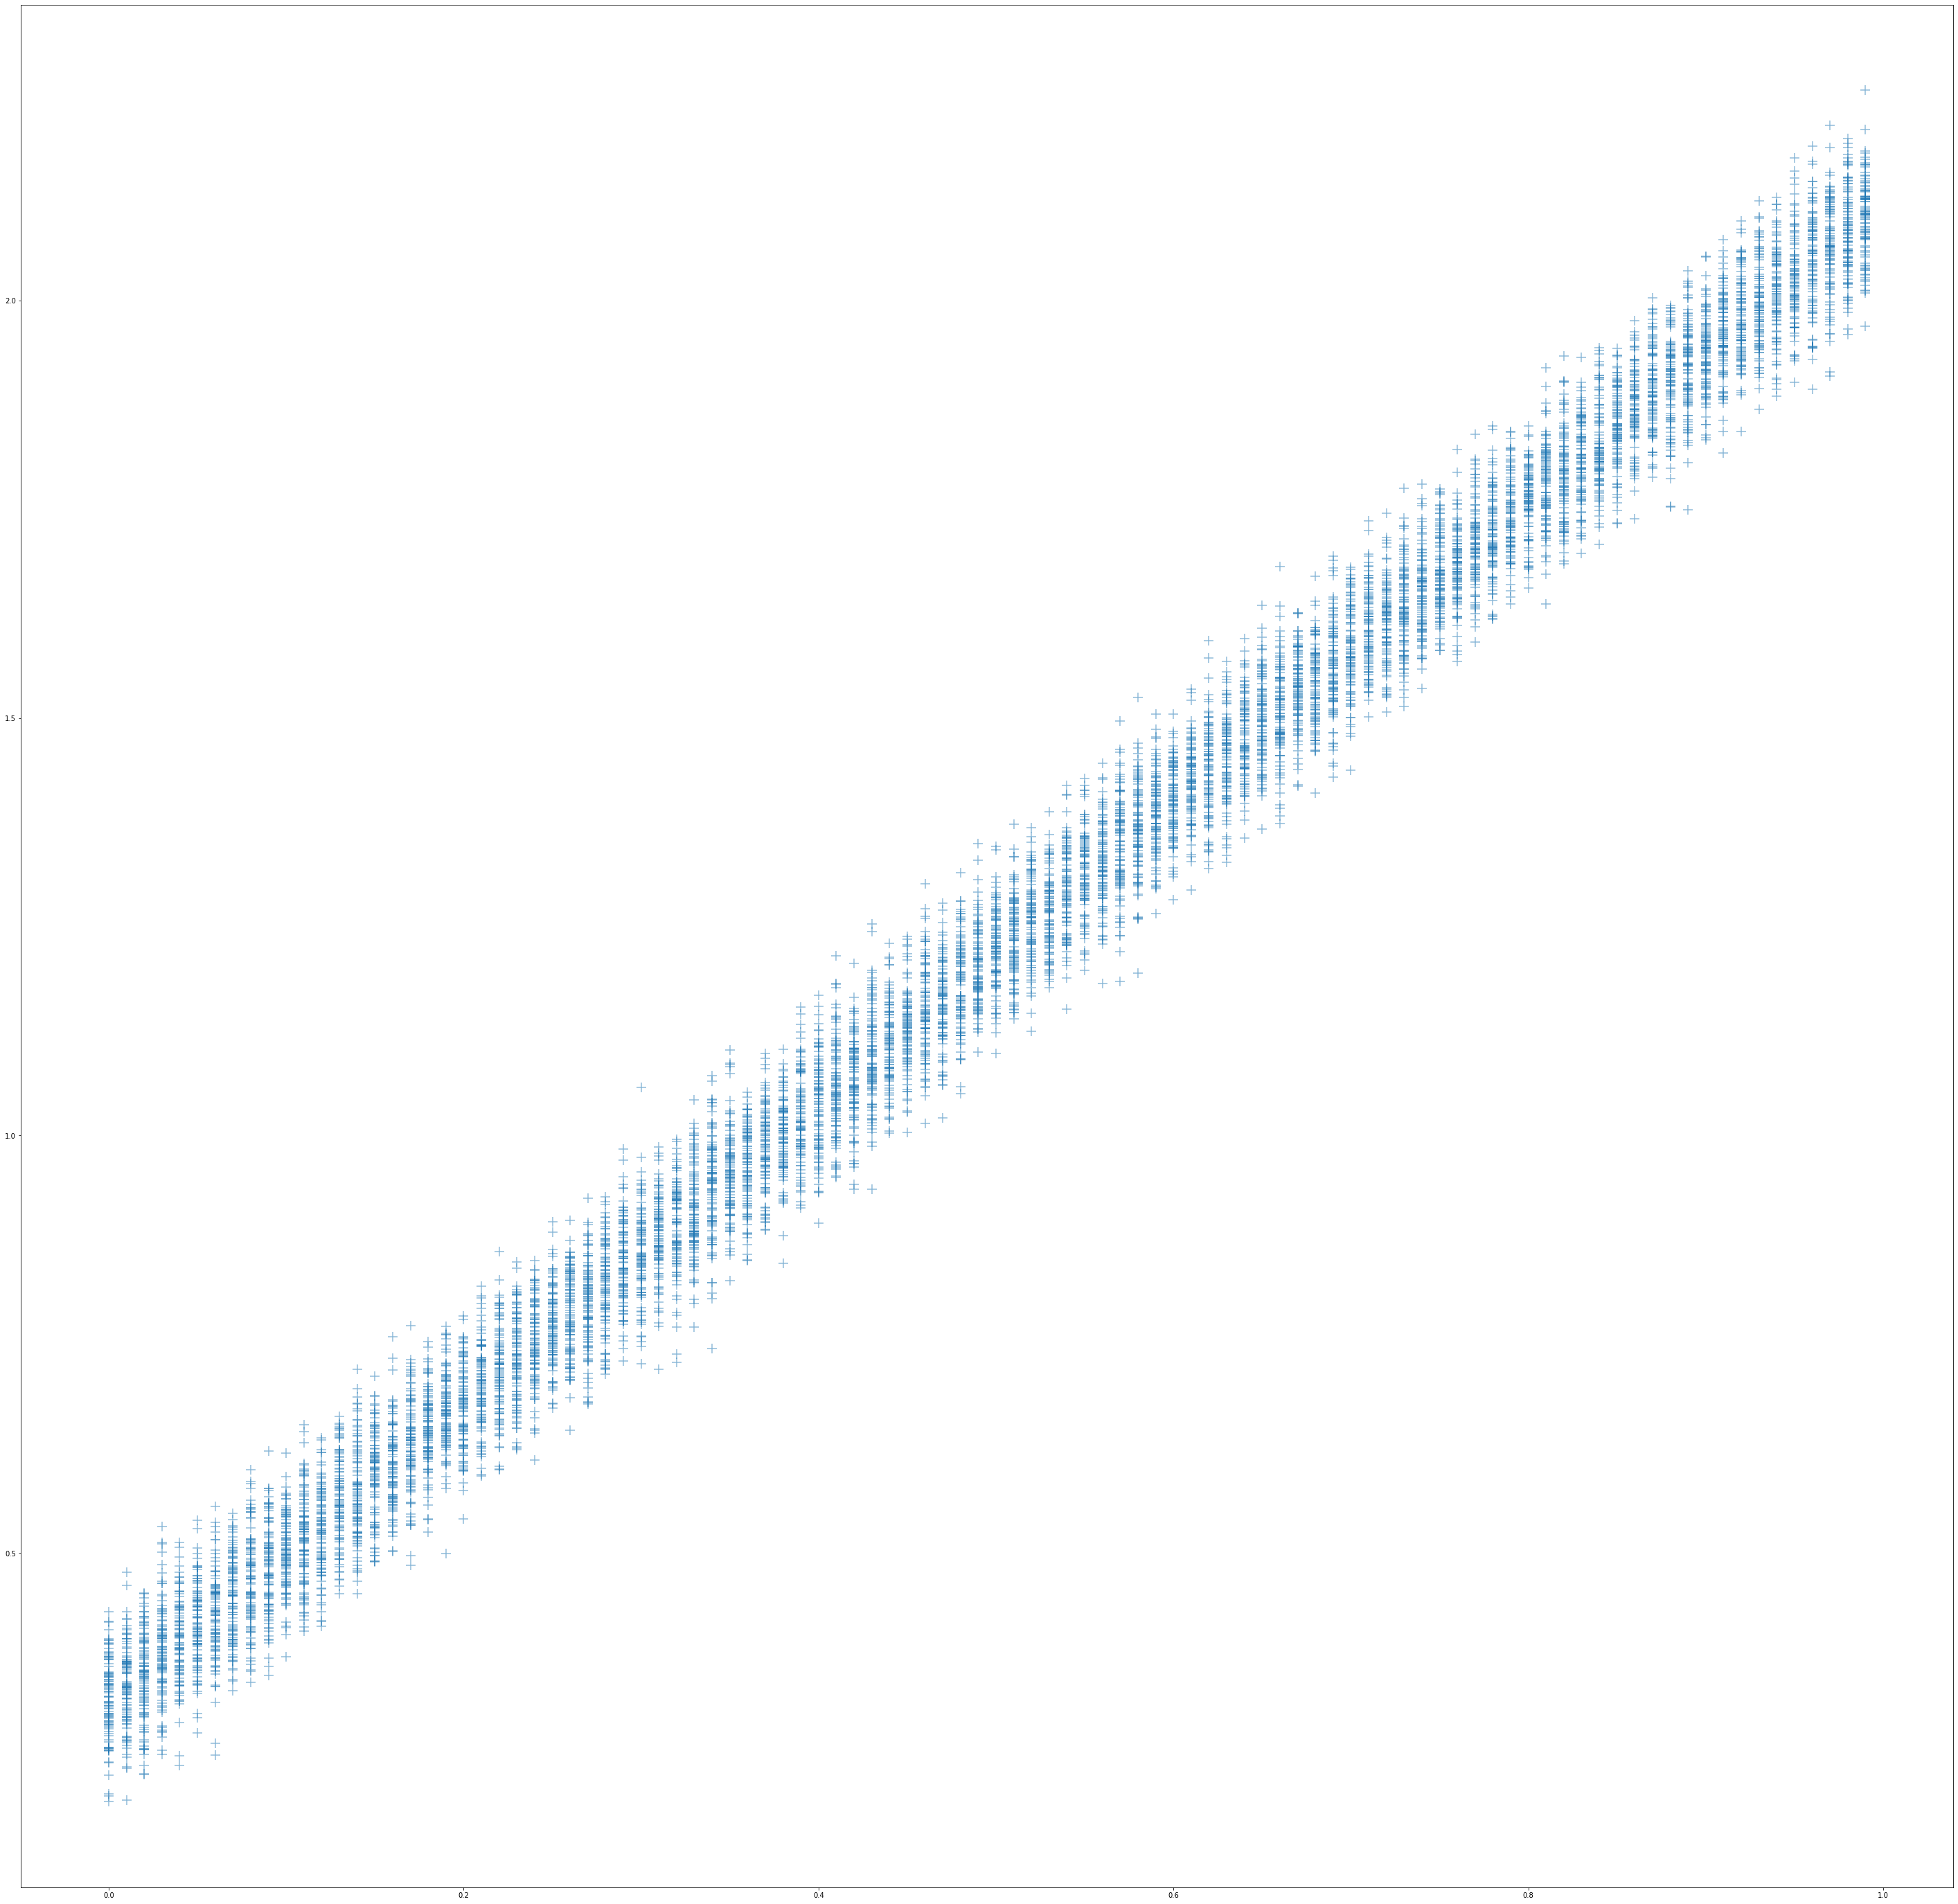

In [30]:
# 데이터 분포 확인
fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(111)
ax.scatter(
    x=noised_scaled_data_C,
    y=noised_scaled_data_F,
    alpha=0.5, s=200, marker='+'
    )
plt.show()

In [31]:
# 단일 뉴런 모델 생성
model2 = Sequential()
model2.add(InputLayer(input_shape=(1,)))
model2.add(Dense(1))
model2.compile(loss='mse', optimizer='rmsprop')
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
# 학습 전 예측 결과
print(model2.predict([0.01]))

[[0.0018131]]


In [34]:
fit_hist2 = model2.fit(noised_scaled_data_C, noised_scaled_data_F, epochs=20)

Epoch 1/20
313/313 [==============================] - 1s 909us/step - loss: 0.9713
Epoch 2/20
313/313 [==============================] - 0s 950us/step - loss: 0.3107
Epoch 3/20
313/313 [==============================] - 0s 940us/step - loss: 0.0714
Epoch 4/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0310
Epoch 5/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 6/20
313/313 [==============================] - 0s 932us/step - loss: 0.0031
Epoch 7/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 8/20
313/313 [==============================] - 0s 940us/step - loss: 0.0025
Epoch 9/20
313/313 [==============================] - 0s 951us/step - loss: 0.0025
Epoch 10/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 11/20
313/313 [==============================] - 0s 965us/step - loss: 0.0025
Epoch 12/20
313/313 [==============================] - 0s 931us/step - loss: 0.0025
Epoch 13/

In [35]:
# 학습 후 모델 저장
model2.save('noised_after_learning.h5')

In [38]:
# 학습 후 예측 결과
print(model2.predict([0.01]))

[[0.3392999]]


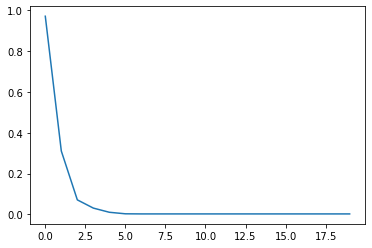

In [36]:
# 학습 횟수에 따른 loss 변화
plt.plot(fit_hist2.history['loss'])
plt.show()